In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import cv2
import skimage
from PIL import ImageFont, ImageDraw, Image

%matplotlib inline

In [145]:
from image_processing.crop import find_table_and_bottom, extract_table_boxes, extract_blocks 
from image_processing.utils import *

In [146]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [147]:
%autoreload 2

In [148]:
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [157]:
IMG_PATH = 'images/photo_examples/UNADJUSTEDNONRAW_thumb_ab.jpg'
# IMG_PATH = 'images/photo_to_scan_aa.jpg'
# IMG_PATH = 'images/ex1.jpg'

In [158]:
img = Image.open(IMG_PATH).convert('L')
img_np = np.asarray(img)

In [159]:
# plt.imshow(img_np, cmap='gray')
# plt.show()

# Full pipeline

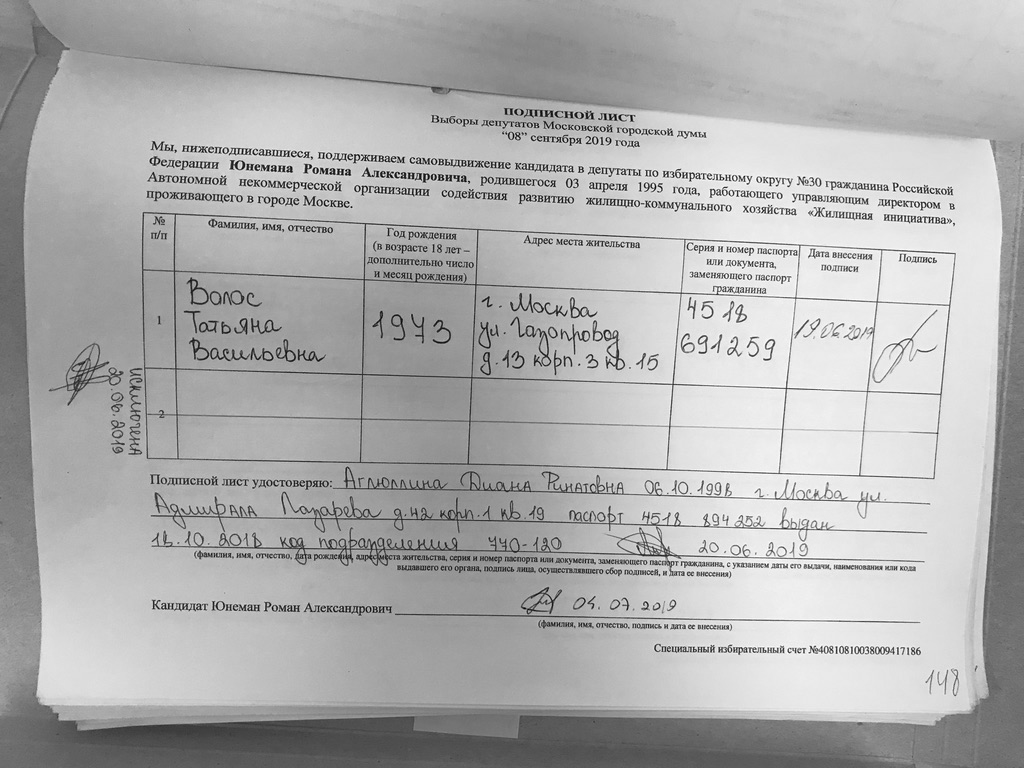

In [162]:
img

In [165]:
result = extract_blocks(np.array(img), debug=True)

Exception: Table contour not found on image

In [ ]:
for i, line in enumerate(result['table_lines']):
    plt.figure(figsize=(15, 2))
    plt.suptitle(f'Table line {i}')
    for j, (key, cell_img) in enumerate(line.items()):
        plt.subplot(1, 5, j+1)
        plt.imshow(cell_img, cmap=plt.cm.gray)
        plt.title(key)
        plt.gca().axes.xaxis.set_visible(False)
        plt.gca().axes.yaxis.set_visible(False)


    plt.show()

plt.figure(figsize=(15, 5))
plt.suptitle(f'Bottom lines')
for i, line in enumerate(result['bottom_lines']):
    
    plt.subplot(5, 1, i+1)
    plt.imshow(line, cmap=plt.cm.gray)
    plt.title(f'Bottom line {i}')
    plt.gca().axes.xaxis.set_visible(False)
    plt.gca().axes.yaxis.set_visible(False)
plt.show()

plt.figure(figsize=(15, 2))
plt.imshow(result['account_number'], cmap=plt.cm.gray)
plt.show()

# Pytesseract

In [285]:
# https://tesseract-ocr.github.io/tessdoc/Installation.html
from image_processing.tesseract_ocr import *

In [286]:
print(img_to_string(result['account_number']))

Специальный избирательный счет 40810810538000090277.


Расе ЖА, 66.ний ре


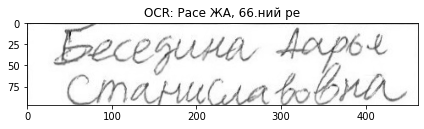

198


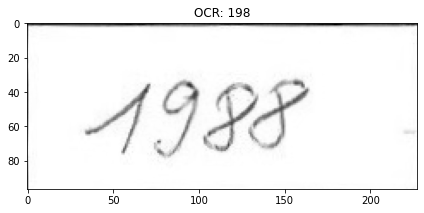

9. Иса, м  УбиАмина 9.19 д.2


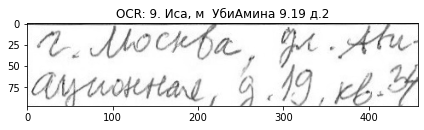

 4505 7555


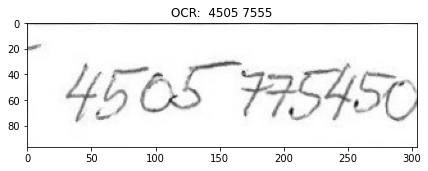

ОТ.о7 224


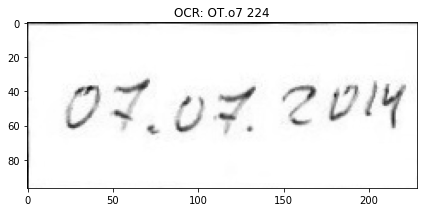

In [287]:
for key in result['table_lines'][0].keys():
    recognized = img_to_string(lines[0][key])
    print(recognized)
    plt.figure(figsize=(7, 4))
    plt.title(f'OCR: {recognized}')
    plt.imshow(lines[0][key], cmap=plt.cm.gray)
    plt.show()

 С аПодписной лист удостоверяю . д 2. СКАМАЛА. 20.0. 2522 Р СА


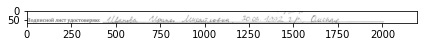

АЕ О р Е Е т чичченнниь А нь , Сейв Заре св. Чь. Рывомья Имта Фр 06, 24  ддеторт  6000 49. 50


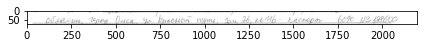

 53 И не оСИР В 7 7 Кид СА И Ио ЕЕ о ии 


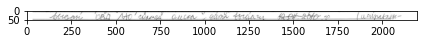

   м  и       ны ко70.09. о 12.0раА, Уию Л С ПА


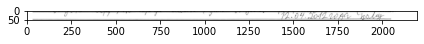

не бане о Аб  фамилия, имя, отчество, дата рождения, адрес места жительства, серия и номер паспорта или документа, заменяющего паспорт гражданина, с указанием даты его выдачи, 773 1 д наименования или кода выдавшегу его органа, подпись лица, осуществлявше р подписей, и дата ее внесения й 97 м Кади Г Мик РР го. 98 99 299


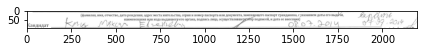

In [288]:
for line_img in result['bottom_lines']:
    recognized = img_to_string(line_img)
    print(recognized)
    plt.figure(figsize=(7, 4))
    plt.imshow(line_img, cmap=plt.cm.gray)
    plt.show()